# Sample

In [18]:
# Loading
library(ggplot2)

options(repr.plot.width=4, repr.plot.height=3)

In [19]:
# Load the data
data(mtcars)
df <- mtcars[, c("mpg", "cyl", "wt")]
# Convert cyl to a factor variable
df$cyl <- as.factor(df$cyl)
head(df)

,mpg,cyl,wt
Mazda RX4,21.0,6,2.620
Mazda RX4 Wag,21.0,6,2.875
Datsun 710,22.8,4,2.320
Hornet 4 Drive,21.4,6,3.215
Hornet Sportabout,18.7,8,3.440
Valiant,18.1,6,3.460


### plot = data + Aesthetics + geometry.

+     data: a data frame.
+     Aesthetics: used to specify x and y variables, color, size, shape, ….
+     Geometry: the type of plots (histogram, boxplot, line, density, dotplot, bar, …)


In [20]:
set.seed(1234)
wdata = data.frame(
        sex = factor(rep(c("F", "M"), each=200)),
        weight = c(rnorm(200, 55), rnorm(200, 58)))
head(wdata)

sex,weight
F,53.79293
F,55.27743
F,56.08444
F,52.65430
F,55.42912
F,55.50606


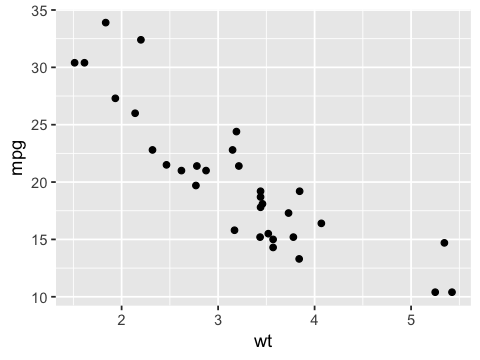

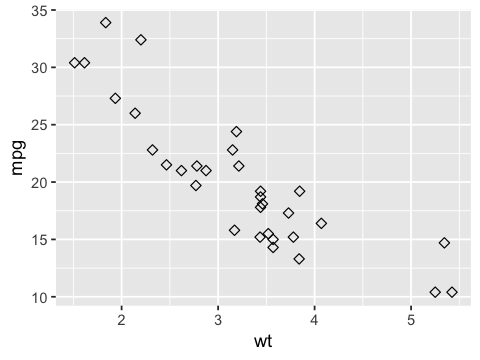

In [21]:
# Basic scatter plot
ggplot(data = mtcars, aes(x = wt, y = mpg)) + 
  geom_point()

# Change the point size, and shape
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point(size = 2, shape = 23)

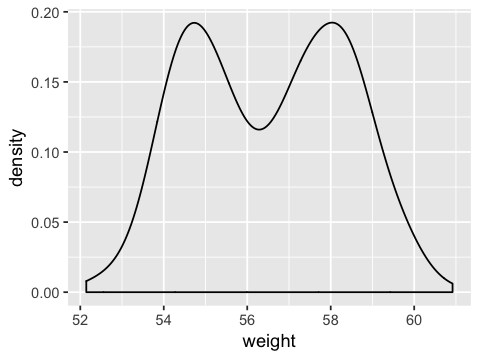

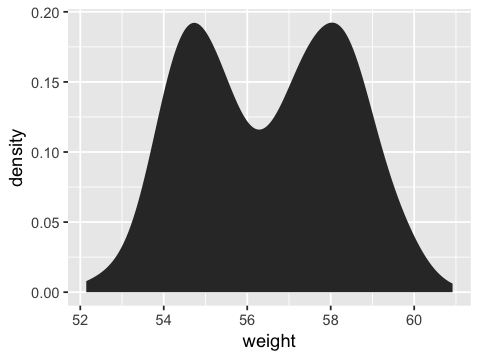

In [22]:
# Use geometry function
ggplot(wdata, aes(x = weight)) + geom_density()
# OR use stat function
ggplot(wdata, aes(x = weight)) + stat_density()

In [23]:
library(plyr)
mu <- ddply(wdata, "sex", summarise, grp.mean=mean(weight))
head(mu)

sex,grp.mean
F,54.94224
M,58.07325


In [24]:
a <- ggplot(wdata, aes(x = weight))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


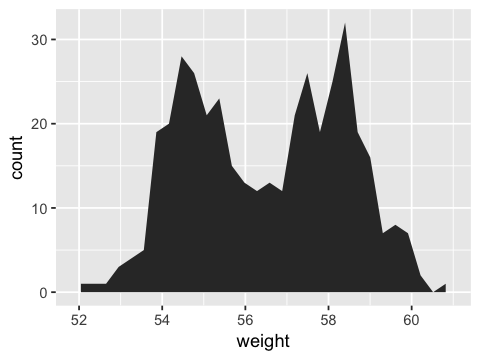

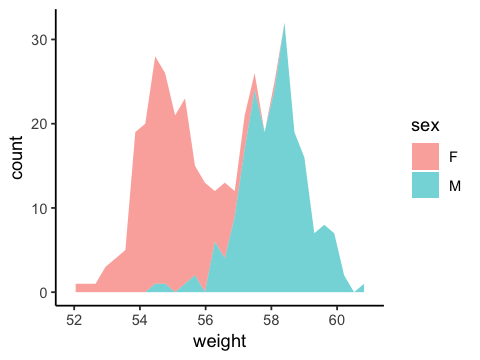

In [25]:
# Basic plot
a + geom_area(stat = "bin")
# change fill colors by sex
a + geom_area(aes(fill = sex), stat ="bin", alpha=0.6) +
  theme_classic()

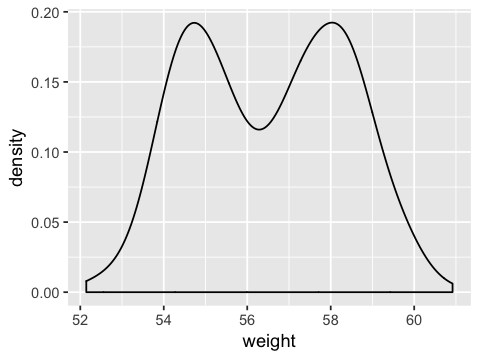

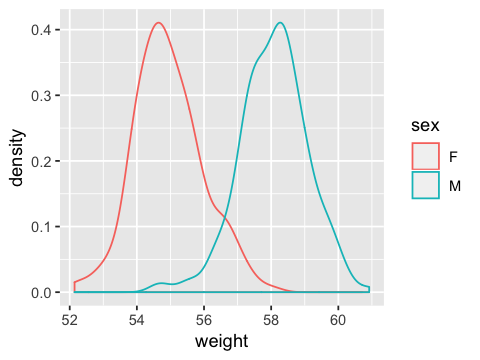

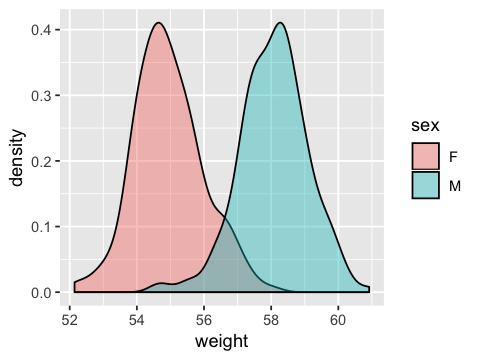

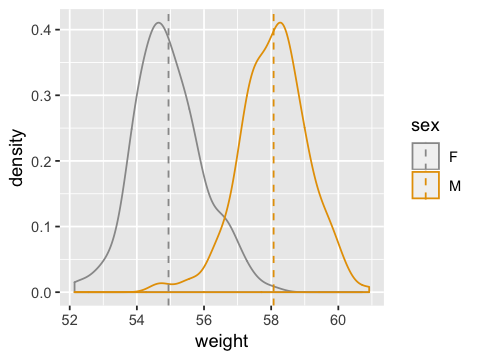

In [26]:


# Basic plot
a + geom_density()
# change line colors by sex
a + geom_density(aes(color = sex)) 
# Change fill color by sex
# Use semi-transparent fill: alpha = 0.4
a + geom_density(aes(fill = sex), alpha=0.4)
   
# Add mean line and Change color manually
a + geom_density(aes(color = sex)) +
  geom_vline(data=mu, aes(xintercept=grp.mean, color=sex),
             linetype="dashed") +
  scale_color_manual(values=c("#999999", "#E69F00"))

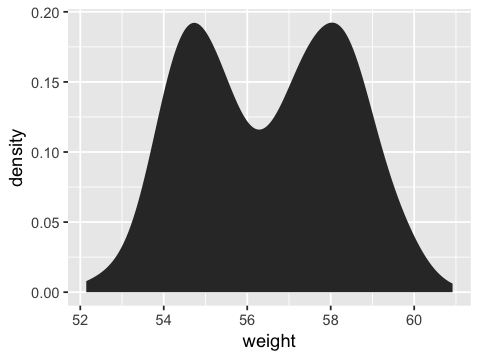

In [27]:
a + stat_density()

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


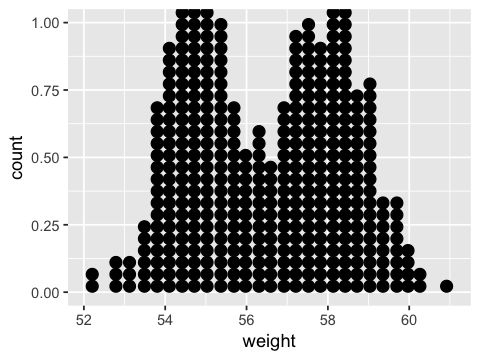

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


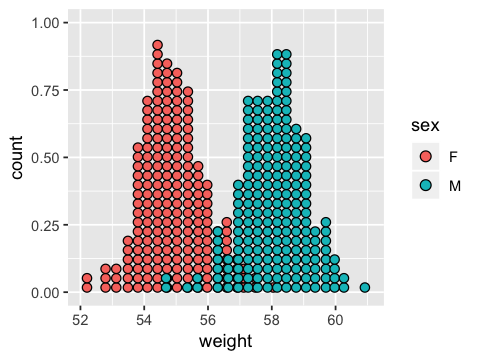

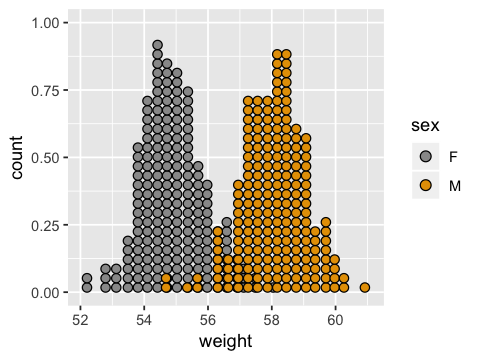

In [28]:
# Basic plot
a + geom_dotplot()
# change fill and color by sex
a + geom_dotplot(aes(fill = sex)) 
# Change fill color manually 
a + geom_dotplot(aes(fill = sex)) +
  scale_fill_manual(values=c("#999999", "#E69F00"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


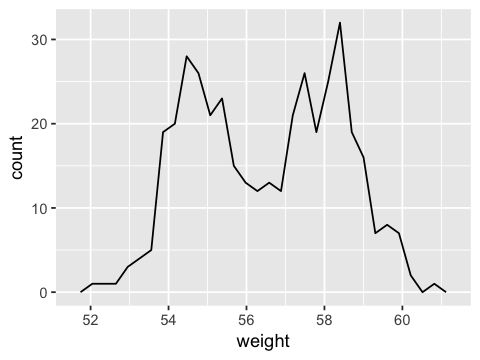

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


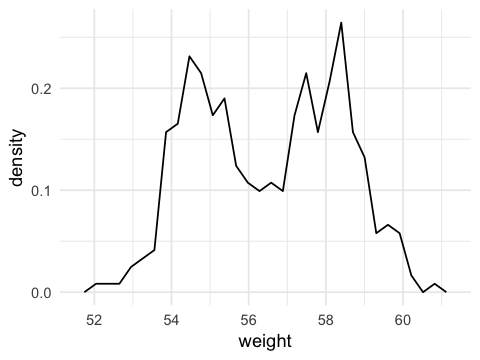

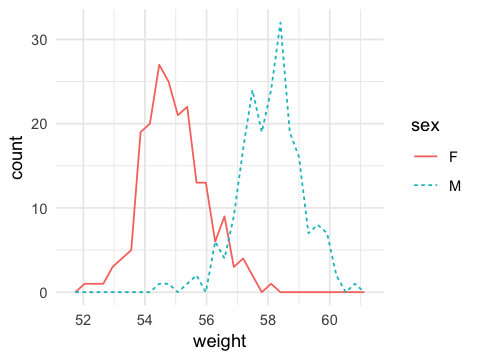

In [29]:
# Basic plot
a + geom_freqpoly() 
# change y axis to density value
# and change theme
a + geom_freqpoly(aes(y = ..density..)) +
  theme_minimal()
# change color and linetype by sex
a + geom_freqpoly(aes(color = sex, linetype = sex)) +
  theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


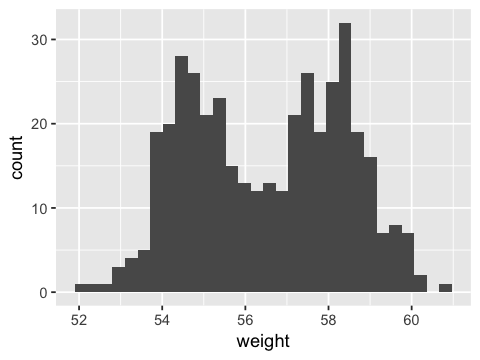

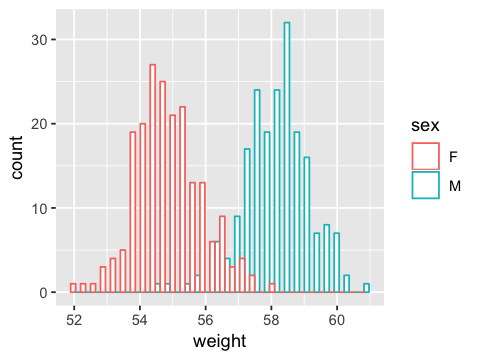

In [30]:
# Basic plot
a + geom_histogram()
# change line colors by sex
a + geom_histogram(aes(color = sex), fill = "white",
                   position = "dodge") 

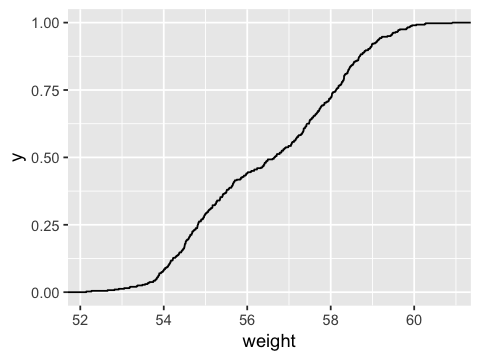

In [32]:
a + stat_ecdf()

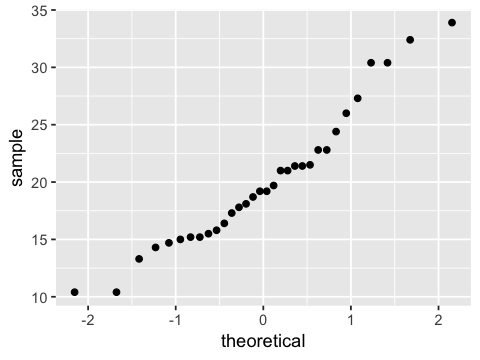

In [33]:
ggplot(mtcars, aes(sample=mpg)) + stat_qq()

## One variable: Discrete

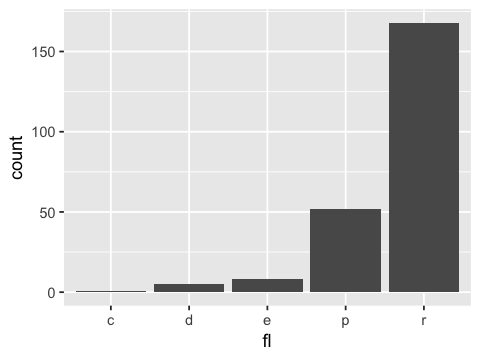

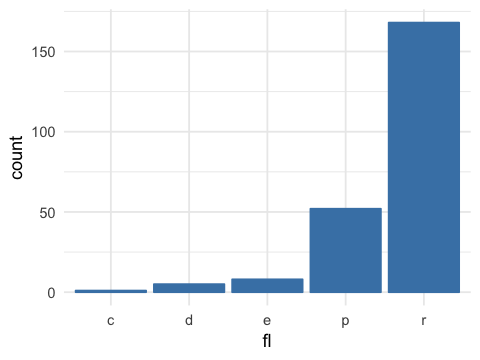

In [34]:
data(mpg)
b <- ggplot(mpg, aes(fl))
# Basic plot
b + geom_bar()
# Change fill color
b + geom_bar(fill = "steelblue", color ="steelblue") +
  theme_minimal()

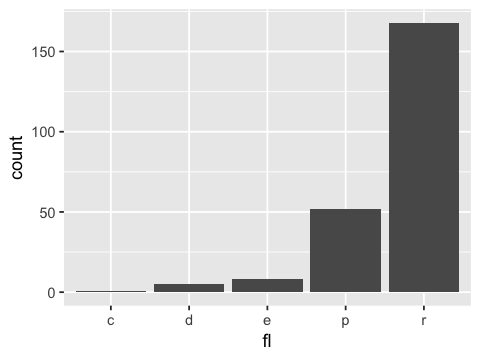

In [35]:
b + stat_count()

## Two variables: Continuous X, Continuous Y

In [37]:
data(mtcars)
mtcars$cyl <- as.factor(mtcars$cyl)
head(mtcars[, c("wt", "mpg", "cyl")])

,wt,mpg,cyl
Mazda RX4,2.620,21.0,6
Mazda RX4 Wag,2.875,21.0,6
Datsun 710,2.320,22.8,4
Hornet 4 Drive,3.215,21.4,6
Hornet Sportabout,3.440,18.7,8
Valiant,3.460,18.1,6


In [38]:
b <- ggplot(mtcars, aes(x = wt, y = mpg))

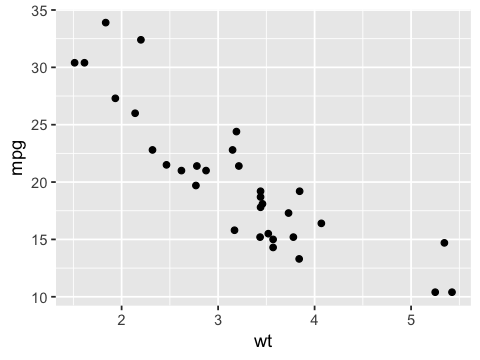

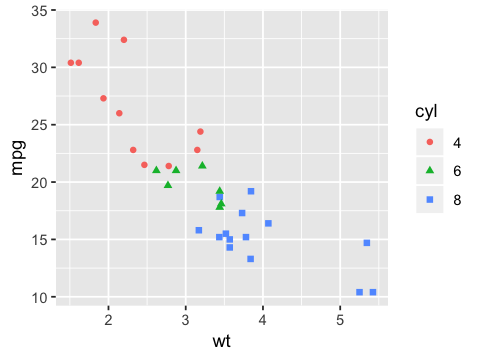

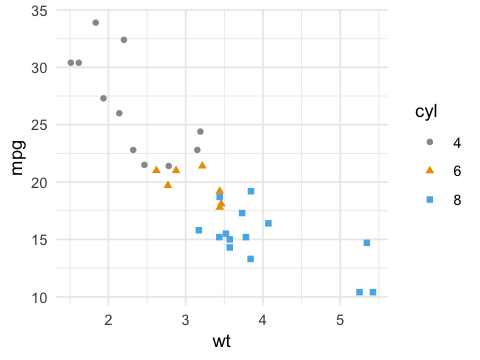

In [39]:
# Basic plot
b + geom_point()
   
# change the color and the point 
# by the levels of cyl variable
b + geom_point(aes(color = cyl, shape = cyl)) 
# Change color manually
b + geom_point(aes(color = cyl, shape = cyl)) +
  scale_color_manual(values = c("#999999", "#E69F00", "#56B4E9"))+
  theme_minimal()

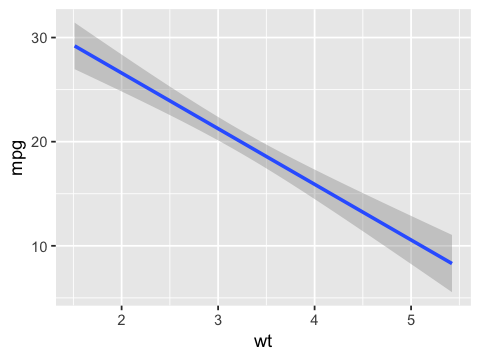

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


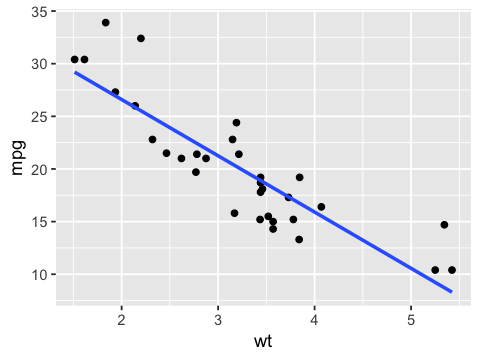

Warning message:
“Ignoring unknown aesthetics: shape”

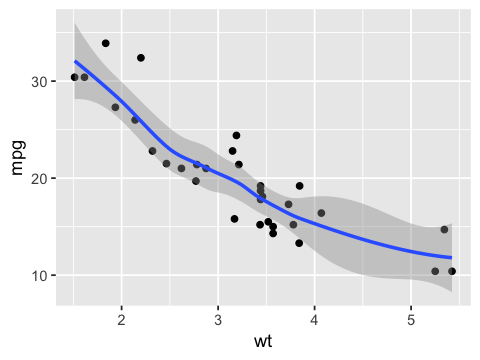

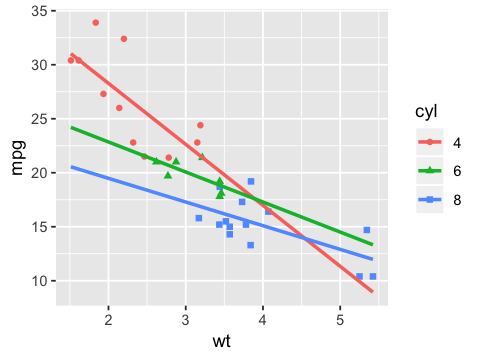

In [40]:
# Regression line only
b + geom_smooth(method = lm)
  
# Point + regression line
# Remove the confidence interval 
b + geom_point() + 
  geom_smooth(method = lm, se = FALSE)
# loess method: local regression fitting
b + geom_point() + geom_smooth()
# Change color and shape by groups (cyl)
b + geom_point(aes(color=cyl, shape=cyl)) + 
  geom_smooth(aes(color=cyl, shape=cyl), 
              method=lm, se=FALSE, fullrange=TRUE)

Smoothing formula not specified. Using: y ~ x


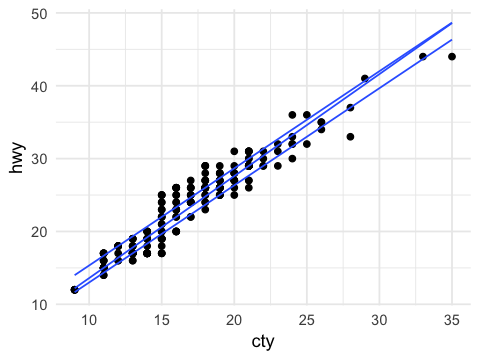

In [43]:
ggplot(mpg, aes(cty, hwy)) +
  geom_point() + geom_quantile() +
  theme_minimal()

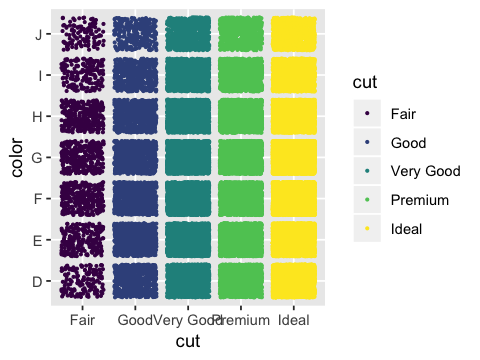

In [44]:
ggplot(diamonds, aes(cut, color)) +
  geom_jitter(aes(color = cut), size = 0.5)